In [71]:
# Import the random module.
import random 
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit

In [72]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

11.3 µs ± 125 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [73]:
def latitudes(x):
    latitudes = []
    while x < 1501:
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with x = 1.
%timeit latitudes(1)

1.59 ms ± 33.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [74]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [76]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [77]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [78]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [79]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [80]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [81]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [82]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2542cf2578abf24fac37456405279597


In [83]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2542cf2578abf24fac37456405279597&q=Boston


In [84]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [85]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [86]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [87]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":803,"main":"Clouds","description":"broken clouds","icon":"04n"}],"base":"stations","main":{"temp":41.23,"pressure":1015,"humidity":60,"temp_min":36,"temp_max":46.4},"wind":{"speed":11.41,"deg":230},"clouds":{"all":62},"dt":1573431548,"sys":{"type":1,"id":4967,"country":"US","sunrise":1573385312,"sunset":1573421271},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [88]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 41.23,
  'pressure': 1015,
  'humidity': 60,
  'temp_min': 36,
  'temp_max': 46.4},
 'wind': {'speed': 11.41, 'deg': 230},
 'clouds': {'all': 62},
 'dt': 1573431548,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1573385312,
  'sunset': 1573421271},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [89]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [90]:
# Get the JSON data.
boston_data = city_weather.json()

In [91]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 46.4 60 62 11.41


In [92]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2019-11-11 00:19:08'

In [93]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [94]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [95]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [96]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | lebu
Processing Record 2 of Set 13 | vigrestad
Processing Record 3 of Set 13 | hofn
Processing Record 4 of Set 13 | sa kaeo
Processing Record 5 of Set 13 | talara
Processing Record 6 of Set 13 | inongo
Processing Record 7 of Set 13 | kapaa
Processing Record 8 of Set 13 | san patricio
Processing Record 9 of Set 13 | jamestown
Processing Record 10 of Set 13 | meulaboh
Processing Record 11 of Set 13 | hilo
Processing Record 12 of Set 13 | doctor pedro p. pena
City not found. Skipping...
Processing Record 13 of Set 13 | port elizabeth
Processing Record 14 of Set 13 | albany
Processing Record 15 of Set 13 | carnarvon
Processing Record 16 of Set 13 | coihueco
Processing Record 17 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 13 | saint george
Processing Record 19 of Set 13 | malabor
Processing Record 20 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 13 | zirgan
Processing Record 22 of Set 13 | 

Processing Record 32 of Set 16 | aguimes
Processing Record 33 of Set 16 | opunake
Processing Record 34 of Set 16 | georgetown
Processing Record 35 of Set 16 | ancud
Processing Record 36 of Set 16 | polunochnoye
Processing Record 37 of Set 16 | pizarro
Processing Record 38 of Set 16 | gympie
Processing Record 39 of Set 16 | lahaina
Processing Record 40 of Set 16 | dipkarpaz
City not found. Skipping...
Processing Record 41 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 16 | takoradi
Processing Record 43 of Set 16 | lavrentiya
Processing Record 44 of Set 16 | talnakh
Processing Record 45 of Set 16 | avarua
Processing Record 46 of Set 16 | trincomalee
Processing Record 47 of Set 16 | guarapari
Processing Record 48 of Set 16 | alofi
Processing Record 49 of Set 16 | saint-philippe
Processing Record 50 of Set 16 | maxixe
Processing Record 1 of Set 17 | rantauprapat
Processing Record 2 of Set 17 | saskylakh
Processing Record 3 of Set 17 | touros
Processing Reco

Processing Record 13 of Set 20 | graham
Processing Record 14 of Set 20 | yarovoye
Processing Record 15 of Set 20 | yulara
Processing Record 16 of Set 20 | vila
Processing Record 17 of Set 20 | requena
Processing Record 18 of Set 20 | inuvik
Processing Record 19 of Set 20 | faanui
Processing Record 20 of Set 20 | sao filipe
Processing Record 21 of Set 20 | mao
Processing Record 22 of Set 20 | mercedes
Processing Record 23 of Set 20 | leningradskiy
Processing Record 24 of Set 20 | provideniya
Processing Record 25 of Set 20 | alghero
Processing Record 26 of Set 20 | keetmanshoop
Processing Record 27 of Set 20 | toktogul
Processing Record 28 of Set 20 | skjervoy
Processing Record 29 of Set 20 | freeport
Processing Record 30 of Set 20 | tabou
Processing Record 31 of Set 20 | cabo san lucas
Processing Record 32 of Set 20 | biak
Processing Record 33 of Set 20 | yanam
Processing Record 34 of Set 20 | achisay
City not found. Skipping...
Processing Record 35 of Set 20 | pimentel
Processing Recor

Processing Record 49 of Set 23 | sitka
Processing Record 50 of Set 23 | boralday
Processing Record 1 of Set 24 | bow island
Processing Record 2 of Set 24 | skovorodino
Processing Record 3 of Set 24 | fare
Processing Record 4 of Set 24 | giyani
Processing Record 5 of Set 24 | lasa
Processing Record 6 of Set 24 | burica
City not found. Skipping...
Processing Record 7 of Set 24 | ludgerovice
Processing Record 8 of Set 24 | santa catarina mita
Processing Record 9 of Set 24 | kiunga
Processing Record 10 of Set 24 | banda aceh
Processing Record 11 of Set 24 | kurilsk
Processing Record 12 of Set 24 | natitingou
Processing Record 13 of Set 24 | babstovo
Processing Record 14 of Set 24 | awbari
Processing Record 15 of Set 24 | oyama
Processing Record 16 of Set 24 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 24 | boone
Processing Record 18 of Set 24 | klyuchi
Processing Record 19 of Set 24 | xushan
Processing Record 20 of Set 24 | sembe
City not found. Skipping...
Process

In [97]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,8.96,38.73,50.61,75,37,1.61,ET,2019-11-11 00:19:09
1,Vigrestad,58.57,5.70,34.00,92,0,10.00,NO,2019-11-11 00:19:09
2,Hofn,64.25,-15.21,43.02,80,100,42.68,IS,2019-11-11 00:19:10
3,Sa Kaeo,13.80,102.09,67.78,77,97,2.91,TH,2019-11-11 00:19:10
4,Talara,-4.58,-81.27,65.70,90,4,12.28,PE,2019-11-11 00:19:10
5,Inongo,-1.93,18.29,72.84,89,84,0.83,CD,2019-11-11 00:19:10
6,Kapaa,22.08,-159.32,80.60,94,90,10.29,US,2019-11-11 00:19:09
7,San Patricio,-26.98,-56.83,74.05,73,23,9.60,PY,2019-11-11 00:19:11
8,Jamestown,-33.21,138.60,78.49,13,0,18.30,AU,2019-11-11 00:19:11
9,Meulaboh,4.14,96.13,79.57,78,99,3.02,ID,2019-11-11 00:19:11


In [98]:
New_Column_Order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[New_Column_Order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,ET,2019-11-11 00:19:09,8.96,38.73,50.61,75,37,1.61
1,Vigrestad,NO,2019-11-11 00:19:09,58.57,5.70,34.00,92,0,10.00
2,Hofn,IS,2019-11-11 00:19:10,64.25,-15.21,43.02,80,100,42.68
3,Sa Kaeo,TH,2019-11-11 00:19:10,13.80,102.09,67.78,77,97,2.91
4,Talara,PE,2019-11-11 00:19:10,-4.58,-81.27,65.70,90,4,12.28
5,Inongo,CD,2019-11-11 00:19:10,-1.93,18.29,72.84,89,84,0.83
6,Kapaa,US,2019-11-11 00:19:09,22.08,-159.32,80.60,94,90,10.29
7,San Patricio,PY,2019-11-11 00:19:11,-26.98,-56.83,74.05,73,23,9.60
8,Jamestown,AU,2019-11-11 00:19:11,-33.21,138.60,78.49,13,0,18.30
9,Meulaboh,ID,2019-11-11 00:19:11,4.14,96.13,79.57,78,99,3.02


In [99]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [100]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [101]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1573431679.8848424

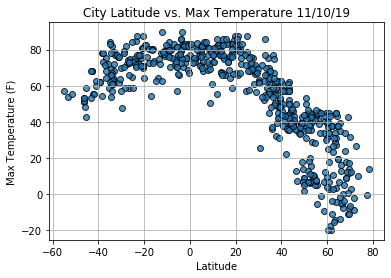

In [102]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

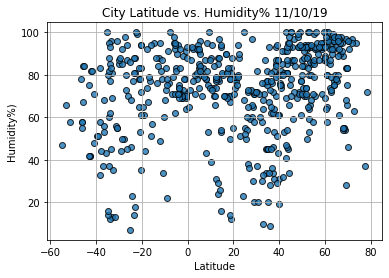

In [103]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity% "+ time.strftime("%x"))
plt.ylabel("Humidity%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

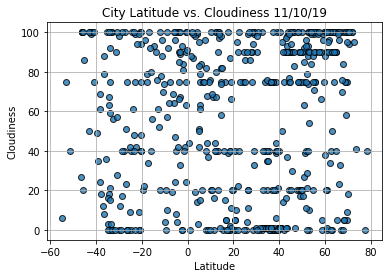

In [104]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

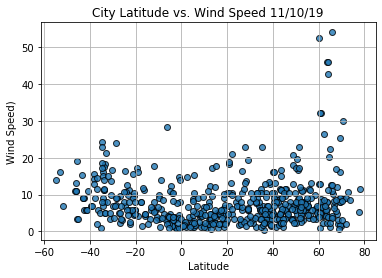

In [105]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [106]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [107]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [108]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is is: 0.011


In [109]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]
regress_values

[73.68973782871005,
 73.05563705897195,
 89.2704995994175,
 76.27143381978658,
 56.750188694278094,
 61.64182320368626,
 81.29894706556718,
 86.00940992647874,
 87.18702564170663,
 63.72529716139714]

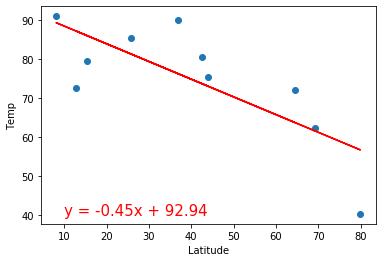

In [110]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [113]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [117]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,ET,2019-11-11 00:19:09,8.96,38.73,50.61,75,37,1.61
1,Vigrestad,NO,2019-11-11 00:19:09,58.57,5.70,34.00,92,0,10.00
2,Hofn,IS,2019-11-11 00:19:10,64.25,-15.21,43.02,80,100,42.68
3,Sa Kaeo,TH,2019-11-11 00:19:10,13.80,102.09,67.78,77,97,2.91
4,Talara,PE,2019-11-11 00:19:10,-4.58,-81.27,65.70,90,4,12.28


In [126]:
index13 =city_data_df.loc[13]
index13

City                    Carnarvon
Country                        ZA
Date          2019-11-11 00:19:12
Lat                        -30.97
Lng                         22.13
Max Temp                    61.45
Humidity                       55
Cloudiness                     28
Wind Speed                   9.78
Name: 13, dtype: object

In [127]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

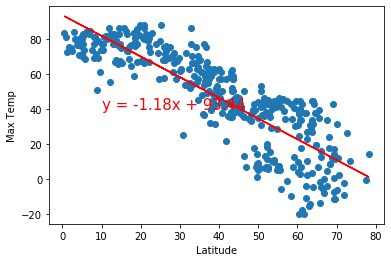

In [128]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [133]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(xs_values, ys_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(xs_values, ys_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = xs_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(xs_values,ys_values)
    plt.plot(xs_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(           line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

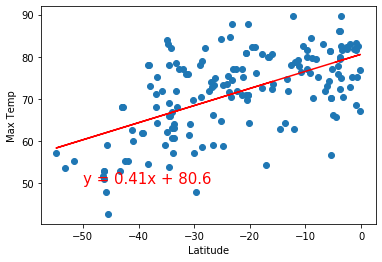

In [142]:
# Linear regression on the Southen Hemisphere
xs_values = southern_hemi_df["Lat"]
ys_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(xs_values, ys_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,50))

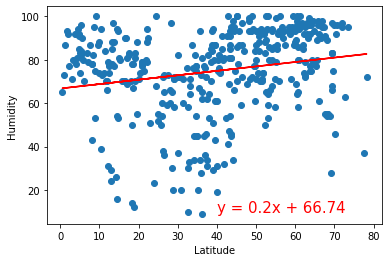

In [137]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Humidity', 'Humidity',(40,10))

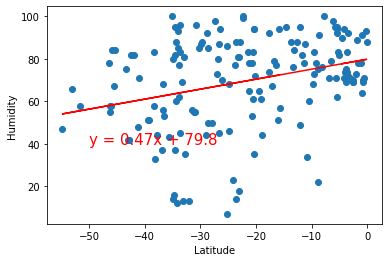

In [143]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Humidity', 'Humidity',(-50,40))

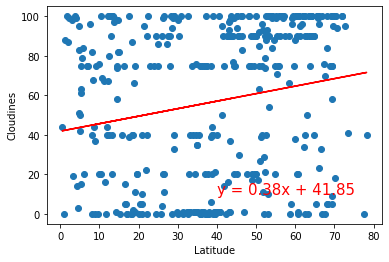

In [144]:
# Linear regression on the Northern Hemisphere cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Cloudines', 'Cloudines',(40,10))

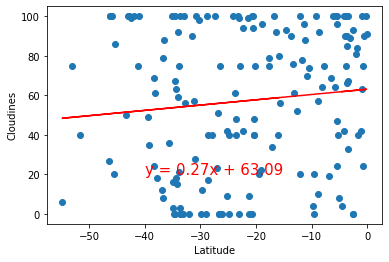

In [146]:
# Linear regression on the Southern Hemisphere cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Cloudines', 'Cloudines',(-40,20))

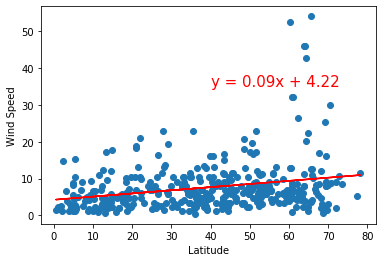

In [148]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

In [149]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere 
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-149-8c4f0e57bb27>, line 6)